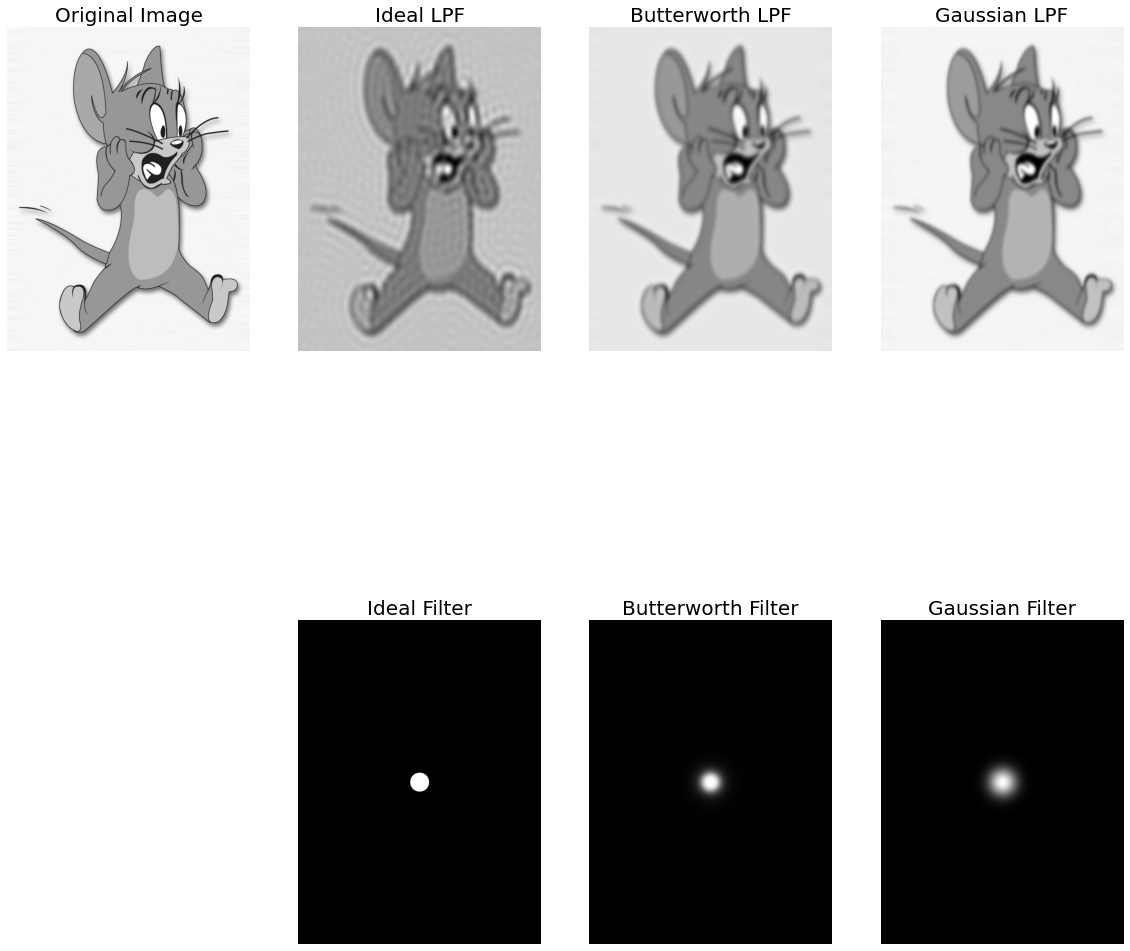

In [2]:
# LOW pass filter

import cv2
import numpy as np
import matplotlib.pyplot as plt

def image_preprocess(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return img

def apply_filter(img_fft, filter_type, cutoff_freq, order=None, sigma=None):
    rows, cols = img_fft.shape
    center_row, center_col = rows // 2 , cols // 2

    # Create a filter
    filter = np.zeros((rows, cols), dtype = np.float32)

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)

            if filter_type == 'ideal':
                if distance <= cutoff_freq:
                    filter[i, j] = 1
                else:
                    filter[i, j] = 0
            elif filter_type == 'butterworth':
                filter[i, j] = 1 / (1 + (distance / cutoff_freq)**(2 * order))
            elif filter_type == 'gaussian':
                filter[i, j] = np.exp(-(distance**2) / (2 * (sigma**2)))

    # Apply the filter to the image in the frequency domain
    img_fft_filtered = img_fft * filter

    return img_fft_filtered,filter

def image_postprocess(img_fft_filtered):
    img_filtered = np.fft.ifft2(np.fft.ifftshift(img_fft_filtered)).real
    #img_filtered = np.uint8(np.clip(img_filtered, 0, 255))
    return img_filtered

def main():
    image_path = 'small2.jpg'
    img = image_preprocess(image_path)

    # Fourier Transform
    img_fft = np.fft.fftshift(np.fft.fft2(img))

    # Apply low-pass filters
    cutoff_freq = 30
    order = 2
    sigma = cutoff_freq

    img_fft_ideal,ideal = apply_filter(img_fft.copy(), 'ideal', cutoff_freq)
    img_fft_butterworth,butter = apply_filter(img_fft.copy(), 'butterworth', cutoff_freq, order)
    img_fft_gaussian,gauss = apply_filter(img_fft.copy(), 'gaussian', cutoff_freq, sigma=sigma)

    # Inverse Fourier Transform and Post-process
    img_filtered_ideal = image_postprocess(img_fft_ideal)
    img_filtered_butterworth = image_postprocess(img_fft_butterworth)
    img_filtered_gaussian = image_postprocess(img_fft_gaussian)

    # Display the results
    plt.figure(figsize=(20,20 ))

    plt.subplot(2,4,1), plt.imshow(img, cmap='gray'), plt.title('Original Image',fontsize=20),plt.axis(False)
    #plt.subplot(1,4,2), plt.imshow(np.log(1 + np.abs(img_fft)), cmap='gray'), plt.title('Fourier Transform')

    plt.subplot(2,4,2), plt.imshow(img_filtered_ideal, cmap='gray'), plt.title('Ideal LPF', fontsize=20),plt.axis(False)
    plt.subplot(2,4,3), plt.imshow(img_filtered_butterworth, cmap='gray'), plt.title('Butterworth LPF', fontsize=20),plt.axis(False)
    plt.subplot(2,4,4), plt.imshow(img_filtered_gaussian, cmap='gray'), plt.title('Gaussian LPF', fontsize=20),plt.axis(False)
    
    
    
    
    plt.subplot(2,4,6), plt.imshow(ideal, cmap='gray'), plt.title('Ideal Filter', fontsize=20),plt.axis(False)
    plt.subplot(2,4,7), plt.imshow(butter, cmap='gray'), plt.title('Butterworth Filter', fontsize=20),plt.axis(False)
    plt.subplot(2,4,8),  plt.imshow(gauss, cmap='gray'), plt.title('Gaussian Filter', fontsize=20),plt.axis(False)

    
if __name__ == "__main__":
    main()


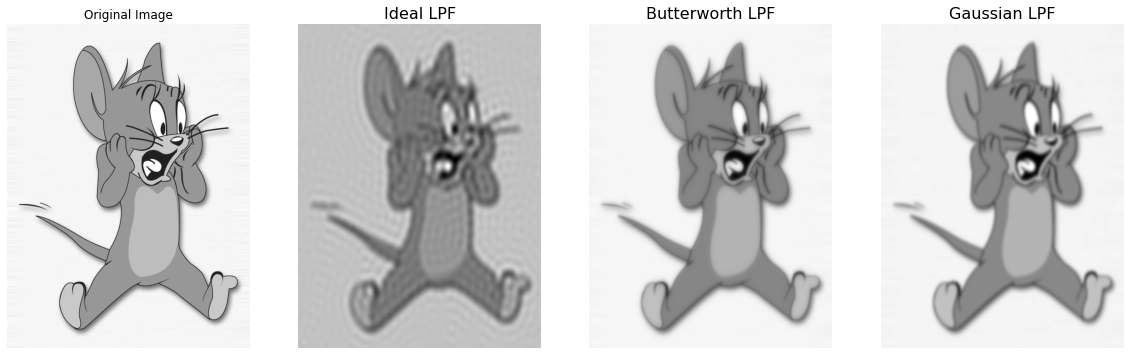

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def image_preprocess(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return img

def apply_filter(img_fft, filter_type, cutoff_freq, order=None, sigma=None):
    rows, cols = img_fft.shape
    center_row, center_col = rows // 2 , cols // 2

    # Create a filter
    filter = np.zeros((rows, cols), dtype = np.float32)

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)

            if filter_type == 'ideal':
                if distance <= cutoff_freq:
                    filter[i, j] = 1
            elif filter_type == 'butterworth':
                filter[i, j] = 1 / (1 + (distance / cutoff_freq)**(2 * order))
            elif filter_type == 'gaussian':
                filter[i, j] = np.exp(-(distance**2) / (2 * (sigma**2)))

    # Apply the filter to the image in the frequency domain
    img_fft_filtered = img_fft * filter

    return img_fft_filtered

def image_postprocess(img_fft_filtered):
    G = np.fft.ifftshift(img_fft_filtered)
    g = np.abs(np.fft.ifft2(G))
    img_filtered = g
    #img_filtered = np.uint8(np.clip(img_filtered, 0, 255))
    return img_filtered

def main():
    image_path = 'small2.jpg'
    img = image_preprocess(image_path)

    # Fourier Transform
    img_fft = np.fft.fftshift(np.fft.fft2(img))

    # Apply low-pass filters
    cutoff_freq = 30
    order = 1
    sigma = cutoff_freq

    img_fft_ideal = apply_filter(img_fft, 'ideal', cutoff_freq)
    img_fft_butterworth = apply_filter(img_fft, 'butterworth', cutoff_freq, order)
    img_fft_gaussian = apply_filter(img_fft, 'gaussian', cutoff_freq, sigma=sigma)

    # Inverse Fourier Transform and Post-process
    img_filtered_ideal = image_postprocess(img_fft_ideal)
    img_filtered_butterworth = image_postprocess(img_fft_butterworth)
    img_filtered_gaussian = image_postprocess(img_fft_gaussian)

    # Display the results
    plt.figure(figsize=(20,20 ))

    plt.subplot(1,4,1), plt.imshow(img, cmap='gray'), plt.title('Original Image'),plt.axis(False)
    #plt.subplot(1,4,2), plt.imshow(np.log(1 + np.abs(img_fft)), cmap='gray'), plt.title('Fourier Transform')

    plt.subplot(1,4,2), plt.imshow(img_filtered_ideal, cmap='gray'), plt.title('Ideal LPF', fontsize=16),plt.axis(False)
    plt.subplot(1,4,3), plt.imshow(img_filtered_butterworth, cmap='gray'), plt.title('Butterworth LPF', fontsize=16),plt.axis(False)
    plt.subplot(1,4,4), plt.imshow(img_filtered_gaussian, cmap='gray'), plt.title('Gaussian LPF', fontsize=16),plt.axis(False)

    plt.show()

if __name__ == "__main__":
    main()


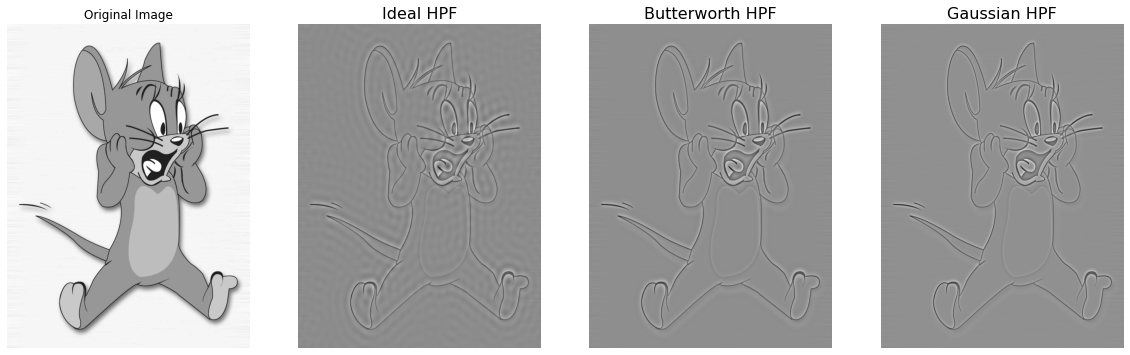

In [17]:
# High Pass filter
import cv2
import numpy as np
import matplotlib.pyplot as plt

def image_preprocess(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return img

def apply_filter(img_fft, filter_type, cutoff_freq, order=None, sigma=None):
    rows, cols = img_fft.shape
    center_row, center_col = rows // 2 , cols // 2

    # Create a filter
    filter = np.zeros((rows, cols), dtype = np.float32)

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)

            if filter_type == 'ideal':
                if distance <= cutoff_freq:
                    filter[i, j] = 1
                   
            elif filter_type == 'butterworth':
                filter[i, j] = 1 / (1 + (distance / cutoff_freq)**(2 * order))
            elif filter_type == 'gaussian':
                filter[i, j] = np.exp(-(distance**2) / (2 * (sigma**2)))
    filter = 1 - filter
    # Apply the filter to the image in the frequency domain
    img_fft_filtered = img_fft * filter

    return img_fft_filtered

def image_postprocess(img_fft_filtered):
    img_filtered = np.fft.ifft2(np.fft.ifftshift(img_fft_filtered)).real
    #img_filtered = np.uint8(np.clip(img_filtered, 0, 255))
    return img_filtered

def main():
    image_path = 'small2.jpg'
    img = image_preprocess(image_path)

    # Fourier Transform
    img_fft = np.fft.fftshift(np.fft.fft2(img))

    # Apply low-pass filters
    cutoff_freq = 30
    order = 2
    sigma = cutoff_freq

    img_fft_ideal = apply_filter(img_fft.copy(), 'ideal', cutoff_freq)
    img_fft_butterworth = apply_filter(img_fft.copy(), 'butterworth', cutoff_freq, order)
    img_fft_gaussian = apply_filter(img_fft.copy(), 'gaussian', cutoff_freq, sigma=sigma)

    # Inverse Fourier Transform and Post-process
    img_filtered_ideal = image_postprocess(img_fft_ideal)
    img_filtered_butterworth = image_postprocess(img_fft_butterworth)
    img_filtered_gaussian = image_postprocess(img_fft_gaussian)

    # Display the results
    plt.figure(figsize=(20,20 ))

    plt.subplot(1,4,1), plt.imshow(img, cmap='gray'), plt.title('Original Image'),plt.axis(False)
    

    plt.subplot(1,4,2), plt.imshow(img_filtered_ideal, cmap='gray'), plt.title('Ideal HPF', fontsize=16),plt.axis(False)
    plt.subplot(1,4,3), plt.imshow(img_filtered_butterworth, cmap='gray'), plt.title('Butterworth HPF', fontsize=16),plt.axis(False)
    plt.subplot(1,4,4), plt.imshow(img_filtered_gaussian, cmap='gray'), plt.title('Gaussian HPF', fontsize=16),plt.axis(False)
    #plt.subplot(1,4,4), plt.imshow(np.log(1 + np.abs(img_fft)), cmap='gray'), plt.title('Fourier Transform')

    plt.show()

if __name__ == "__main__":
    main()


C:\Users\Mugdho\AppData\Local\Temp\ipykernel_14292\381890124.py:28: RuntimeWarning: divide by zero encountered in double_scalars
  filter[i, j] = (1 / (1 + (((distance * W) / ((distance**2) - (cutoff_freq**2)))**(2 * order))))
C:\Users\Mugdho\AppData\Local\Temp\ipykernel_14292\381890124.py:30: RuntimeWarning: divide by zero encountered in double_scalars
  filter[i, j] = 1 - np.exp(-((distance**2 - cutoff_freq**2) / (distance * W))**(2))


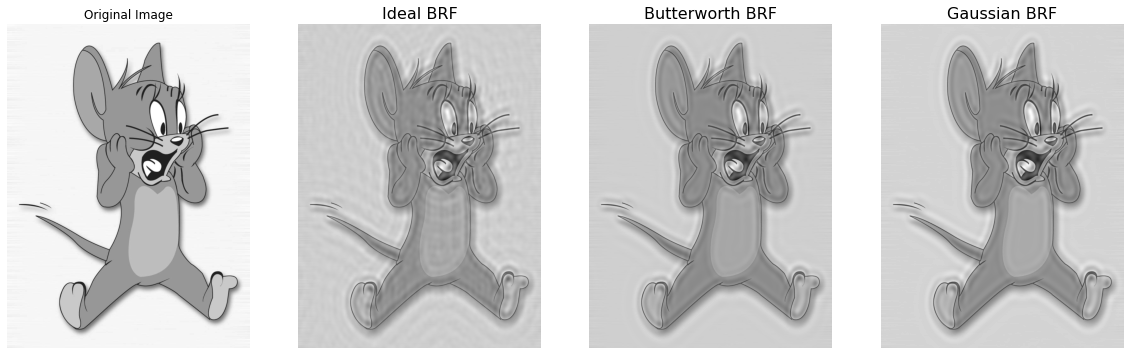

In [42]:
# Band REJECT Filter
import cv2
import numpy as np
import matplotlib.pyplot as plt

def image_preprocess(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return img

def apply_filter(img_fft, filter_type, cutoff_freq,order=None, W=None):
    rows, cols = img_fft.shape
    center_row, center_col = rows // 2 , cols // 2

    # Create a filter
    filter = np.zeros((rows, cols), dtype=np.float32)

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)

            if filter_type == 'ideal':
                if  cutoff_freq - W/2 < distance < cutoff_freq + W/2:
                    filter[i, j] = 0
                else:
                    filter[i, j] = 1

            elif filter_type == 'butterworth':
                filter[i, j] = (1 / (1 + (((distance * W) / ((distance**2) - (cutoff_freq**2)))**(2 * order))))
            elif filter_type == 'gaussian':
                filter[i, j] = 1 - np.exp(-((distance**2 - cutoff_freq**2) / (distance * W))**(2))
    
    # Apply the filter to the image in the frequency domain
    img_fft_filtered = img_fft * filter

    return img_fft_filtered

def image_postprocess(img_fft_filtered):
    img_filtered = np.fft.ifft2(np.fft.ifftshift(img_fft_filtered)).real
    return img_filtered

def main():
    image_path = 'small2.jpg'
    img = image_preprocess(image_path)

    # Fourier Transform
    img_fft = np.fft.fftshift(np.fft.fft2(img))

    # Apply band-reject filters
    cutoff_freq = 30
    order = 2
    W = 20
 

    # Apply ideal filter without W
    img_fft_ideal = apply_filter(img_fft.copy(), 'ideal', cutoff_freq, W=W)

    # Apply other filters with W
    img_fft_butterworth = apply_filter(img_fft.copy(), 'butterworth', cutoff_freq,order=order, W=W)
    img_fft_gaussian = apply_filter(img_fft.copy(), 'gaussian', cutoff_freq,order=order, W=W)

    # Inverse Fourier Transform and Post-process
    img_filtered_ideal = image_postprocess(img_fft_ideal)
    img_filtered_butterworth = image_postprocess(img_fft_butterworth)
    img_filtered_gaussian = image_postprocess(img_fft_gaussian)

    # Display the results
    plt.figure(figsize=(20, 20))

    plt.subplot(1, 4, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image'), plt.axis(False)

    plt.subplot(1, 4, 2), plt.imshow(img_filtered_ideal, cmap='gray'), plt.title('Ideal BRF', fontsize=16), plt.axis(False)
    plt.subplot(1, 4, 3), plt.imshow(img_filtered_butterworth, cmap='gray'), plt.title('Butterworth BRF', fontsize=16), plt.axis(False)
    plt.subplot(1, 4, 4), plt.imshow(img_filtered_gaussian, cmap='gray'), plt.title('Gaussian BRF', fontsize=16), plt.axis(False)

    plt.show()

if __name__ == "__main__":
    main()


C:\Users\Mugdho\AppData\Local\Temp\ipykernel_14292\1743429132.py:28: RuntimeWarning: divide by zero encountered in double_scalars
  filter[i, j] = (1 / (1 + (((distance * W) / ((distance**2) - (cutoff_freq**2)))**(2 * order))))
C:\Users\Mugdho\AppData\Local\Temp\ipykernel_14292\1743429132.py:30: RuntimeWarning: divide by zero encountered in double_scalars
  filter[i, j] = 1 - np.exp(-((distance**2 - cutoff_freq**2) / (distance * W))**(2))


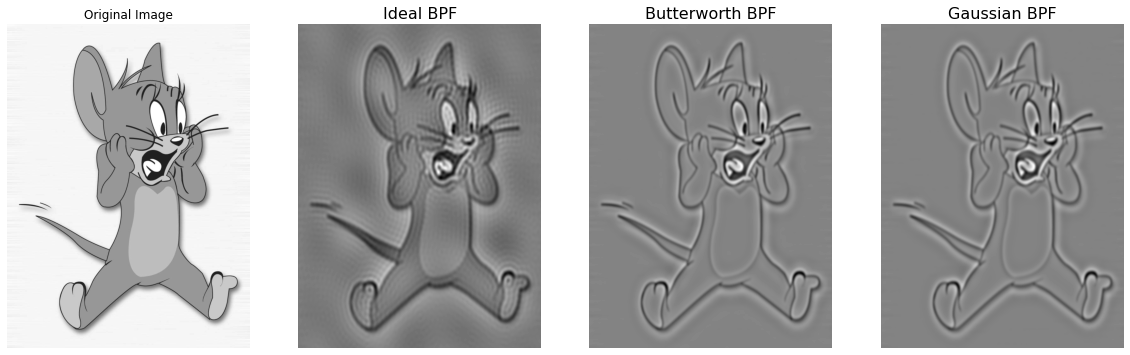

In [44]:
# Band PASS Filter
import cv2
import numpy as np
import matplotlib.pyplot as plt

def image_preprocess(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return img

def apply_filter(img_fft, filter_type, cutoff_freq,order=None, W=None):
    rows, cols = img_fft.shape
    center_row, center_col = rows // 2 , cols // 2

    # Create a filter
    filter = np.zeros((rows, cols), dtype=np.float32)

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)

            if filter_type == 'ideal':
                if  cutoff_freq - W/2 < distance < cutoff_freq + W/2:
                    filter[i, j] = 0
                else:
                    filter[i, j] = 1

            elif filter_type == 'butterworth':
                filter[i, j] = (1 / (1 + (((distance * W) / ((distance**2) - (cutoff_freq**2)))**(2 * order))))
            elif filter_type == 'gaussian':
                filter[i, j] = 1 - np.exp(-((distance**2 - cutoff_freq**2) / (distance * W))**(2))
    filter = 1 - filter
    # Apply the filter to the image in the frequency domain
    img_fft_filtered = img_fft * filter

    return img_fft_filtered

def image_postprocess(img_fft_filtered):
    img_filtered = np.fft.ifft2(np.fft.ifftshift(img_fft_filtered)).real
    return img_filtered

def main():
    image_path = 'small2.jpg'
    img = image_preprocess(image_path)

    # Fourier Transform
    img_fft = np.fft.fftshift(np.fft.fft2(img))

    # Apply band-reject filters
    cutoff_freq = 30
    order = 2
    W = 50
 

    # Apply ideal filter without W
    img_fft_ideal = apply_filter(img_fft.copy(), 'ideal', cutoff_freq, W=W)

    # Apply other filters with W
    img_fft_butterworth = apply_filter(img_fft.copy(), 'butterworth', cutoff_freq,order=order, W=W)
    img_fft_gaussian = apply_filter(img_fft.copy(), 'gaussian', cutoff_freq,order=order, W=W)

    # Inverse Fourier Transform and Post-process
    img_filtered_ideal = image_postprocess(img_fft_ideal)
    img_filtered_butterworth = image_postprocess(img_fft_butterworth)
    img_filtered_gaussian = image_postprocess(img_fft_gaussian)

    # Display the results
    plt.figure(figsize=(20, 20))

    plt.subplot(1, 4, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image'), plt.axis(False)

    plt.subplot(1, 4, 2), plt.imshow(img_filtered_ideal, cmap='gray'), plt.title('Ideal BPF', fontsize=16), plt.axis(False)
    plt.subplot(1, 4, 3), plt.imshow(img_filtered_butterworth, cmap='gray'), plt.title('Butterworth BPF', fontsize=16), plt.axis(False)
    plt.subplot(1, 4, 4), plt.imshow(img_filtered_gaussian, cmap='gray'), plt.title('Gaussian BPF', fontsize=16), plt.axis(False)

    plt.show()

if __name__ == "__main__":
    main()
